In [1]:
from splinter import Browser
from bs4 import BeautifulSoup as soup
from webdriver_manager.chrome import ChromeDriverManager
import json
import numpy as np
import pandas as pd

# Set up Splinter
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)


url = "https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html"
browser.visit(url)

# Parse the HTML
html = browser.html
html_soup = soup(html, 'html.parser')
heads = list(html_soup.find("tr"))
rows = html_soup.find_all("tr", class_="data-row")

browser.quit()

while '\n' in heads:
    heads.remove('\n')

heads = list(map(lambda heading: heading.text, heads))
mars_data = []
for row in rows:
    row_list = list(row)
    row_dict = {}
    
    while '\n' in row_list:
        row_list.remove('\n')
    
    row_list = list(map(lambda datum: datum.text.strip(), row_list))
    mars_data.append([int(row_list[0]),
                      row_list[1],
                      int(row_list[2]),
                      int(row_list[3]),
                      int(row_list[4]),
                      float(row_list[5]),
                      float(row_list[6])])

mars_df = pd.DataFrame(mars_data, columns=heads)
mars_df.to_csv("mars_weather.csv", index=None)

In [2]:
import pandas as pd
import datetime

mars_df = pd.read_csv("mars_weather.csv")

In [3]:
mars_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


In [4]:
# 5. Datetime conversion
mars_df.dtypes

id                    int64
terrestrial_date     object
sol                   int64
ls                    int64
month                 int64
min_temp            float64
pressure            float64
dtype: object

In [5]:
mars_df["terrestrial_date"] = pd.to_datetime(mars_df["terrestrial_date"])
mars_df.dtypes

id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

In [6]:
# 6. Number of months on Mars
mars_df["month"].max()

12

There are 12 months on Mars.

In [7]:
# 7. How many Martian days of data?
martian_days = mars_df["sol"].max() - mars_df["sol"].min()
martian_days

1967

In [8]:
# 8. What are the coldest and the warmest months on Mars (at the location of Curiosity)? Get the answer by averaging the minimum daily temperature of all the months. Plot the results as a bar chart.

temps = mars_df.groupby("month")["min_temp"].mean()
temps

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

<AxesSubplot:xlabel='month'>

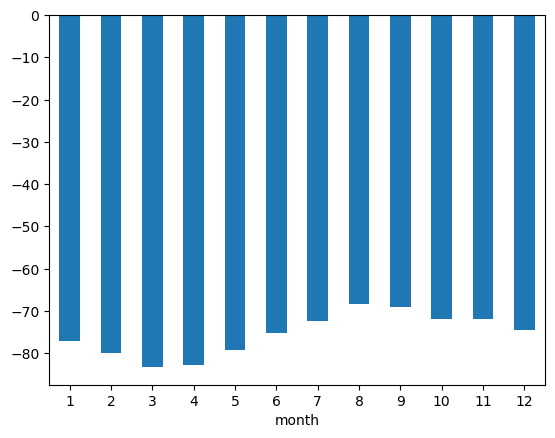

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
temps.plot.bar(x="Month", y="Minimum Temperature", rot=0)

The coldest month is month 4 and the warmest month is month 8.

In [10]:
# 9. Answer the following question: Which months have the lowest and the highest atmospheric pressure on Mars? Get the answer by averaging the daily atmospheric pressure of all the months. Plot the results as a bar chart.
pressures = mars_df.groupby("month")["pressure"].mean()
pressures

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

<AxesSubplot:xlabel='month'>

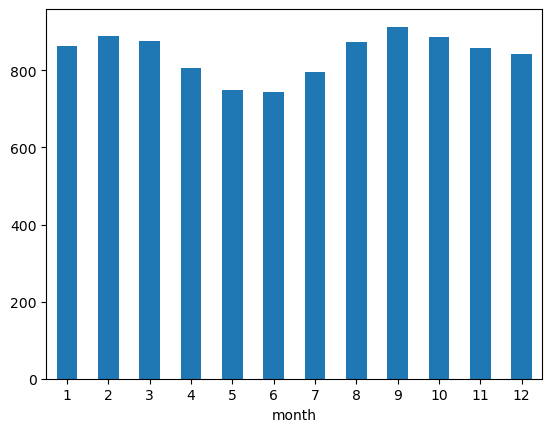

In [11]:
pressures.plot.bar(x="Month", y="Pressure", rot=0)

Month 6 has the lowest atmospheric pressure and month 9 has the highest.

<AxesSubplot:>

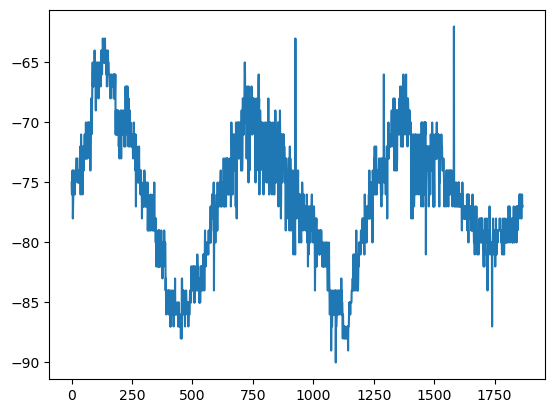

In [12]:
# 10. Answer the following question: About how many terrestrial (Earth) days exist in a Martian year? That is, in the time that Mars circles the Sun once, how many days elapse on Earth? Visually estimate the result by plotting the daily minimum temperature.
mars_df["min_temp"].plot()

According to [NASA](https://mars.nasa.gov/resources/21392/mars-in-a-minute-how-long-is-a-year-on-mars/), one Mars year is about 687 Earth days, which approximately corresponds with the period of the graph that looks like it is around 700 Earth days.

In [13]:
# 10. DataFrame already exported to CSV, see above.